In [1]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys
sys.path.append('../src')
from fantasy_stats_from_pbp import *
from retreive_adp_data import *

In [2]:
# read in df from nfl fast R data collected
pbp = pd.read_pickle('../data/raw/nfl_pbp_data.pkl')
pbp.head()

,aborted_play,air_epa,air_wpa,air_yards,assist_tackle,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,...,xyac_success,yac_epa,yac_wpa,yardline_100,yards_after_catch,yards_gained,ydsnet,ydstogo,year,yrdln
0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.0,NaN,0.0,6.0,0,1999,ARI 30
1,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,77.0,NaN,0.0,6.0,10,1999,PHI 23
2,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,77.0,NaN,1.0,6.0,10,1999,PHI 23
3,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,76.0,NaN,0.0,6.0,9,1999,PHI 24
4,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,81.0,NaN,10.0,6.0,14,1999,PHI 19


In [3]:
josh_allen_id = '00-0034857'
josh_allen_stats = create_player_stats(josh_allen_id, pbp)
josh_allen_stats['fantasy_pts'] = josh_allen_stats.apply(lambda row: calculate_espn_ppr_score(row), axis=1)
josh_allen_stats

c:\Users\irela\Documents\NSS_Projects\ff-draft-optimizer\notebooks\../src\fantasy_stats_from_pbp.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pbp['two_pt'] = np.where((pbp['two_point_conv_result']=='success'), 1, 0)


,id,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,receive_touchdown,fantasy_pts
season,,,,,,,,,,,,
2018,00-0034857,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,0.0,206.86
2019,00-0034857,0,3089.0,20.0,9.0,9.0,4.0,510.0,3.0,0.0,0.0,288.56
2020,00-0034857,1,4544.0,37.0,8.0,10.0,6.0,421.0,0.0,12.0,1.0,396.06
2021,00-0034857,0,4168.0,34.0,6.0,15.0,3.0,700.0,3.0,0.0,0.0,378.72
2022,00-0034857,0,4029.0,32.0,7.0,13.0,5.0,746.0,2.0,0.0,0.0,373.76
2023,00-0034857,0,3947.0,27.0,15.0,16.0,3.0,457.0,3.0,0.0,0.0,369.58
2024,00-0034857,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,0.0,372.34


In [4]:
#all_players = calculate_all_players_season_stats(save_to_csv=True, csv_filepath='../data/processed/season_stats_05_17.csv')
all_players = pd.read_csv('../data/processed/season_stats_05_17.csv')
rosters = pd.read_csv('../data/raw/rosters.csv', index_col=0).reset_index(drop=True)
all_players = pd.merge(all_players, rosters, how='left', left_on=['id', 'season'], right_on=['gsis_id', 'season'])
all_players.head()

C:\Users\irela\AppData\Local\Temp\ipykernel_13676\3239920645.py:3: DtypeWarning: Columns (4,31) have mixed types. Specify dtype option on import or set low_memory=False.
  rosters = pd.read_csv('../data/raw/rosters.csv', index_col=0).reset_index(drop=True)


,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,smart_id,entry_year,rookie_year,draft_club,ngs_position,week,game_type,status_description_abbr,football_name,draft_number
0,1999,0,1276.0,7.0,0.0,9.0,6.0,33.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,0,1047.0,2.0,0.0,8.0,0.0,68.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,0,134.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,1991.0,1991.0,NaN,NaN,18.0,WC,A01,Doug,NaN
4,2003,0,16.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0,...,32005045-4454-3972-51b8-d0b994ae7160,1991.0,1991.0,NaN,NaN,19.0,DIV,A01,Doug,NaN


In [5]:
unnecessary_cols = ['espn_id', 'sportradar_id', 'yahoo_id',
       'rotowire_id', 'pff_id', 'pfr_id', 'fantasy_data_id', 'sleeper_id',
       'esb_id', 'gsis_it_id', 'smart_id', 'entry_year', 'draft_club', 'ngs_position', 'week',
       'game_type', 'status_description_abbr', 'football_name',
       'draft_number']
all_players = all_players[[col for col in all_players.columns if col not in unnecessary_cols]]
all_players.head()

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,first_name,last_name,birth_date,height,weight,college,gsis_id,years_exp,headshot_url,rookie_year
0,1999,0,1276.0,7.0,0.0,9.0,6.0,33.0,0.0,0.0,...,Douglas,Pederson,1968-01-31,75.0,216.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN
1,2000,0,1047.0,2.0,0.0,8.0,0.0,68.0,0.0,0.0,...,Douglas,Pederson,1968-01-31,75.0,216.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN
2,2001,0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,Douglas,Pederson,1968-01-31,75.0,220.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN
3,2002,0,134.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,Doug,Pederson,1968-01-31,75.0,220.0,NaN,00-0012726,11.0,https://static.www.nfl.com/image/private/f_aut...,1991.0
4,2003,0,16.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0,...,Doug,Pederson,1968-01-31,75.0,220.0,NaN,00-0012726,12.0,https://static.www.nfl.com/image/private/f_aut...,1991.0


In [6]:
fantasy_positions = ['QB', 'RB', 'TE', 'WR'] # Not taking kickers or defense into account
all_players = all_players[all_players['position'].isin(fantasy_positions)]

In [7]:
#josh_allen_id = '00-0034857'
#jamar_chase_id = '00-0036900'

## EDA

How are fantasy points distributed by position? (e.g., RBs vs. WRs)

In [8]:
all_players.groupby('position')['fantasy_pts'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
QB,2012.0,99.673300,105.649874,-7.28,7.69,56.26,182.405,417.08
RB,3690.0,81.493409,86.483618,-8.00,12.20,50.30,128.050,481.10
TE,916.0,79.987031,68.740352,-2.00,20.90,61.95,123.800,330.90
WR,4323.0,93.190062,85.058646,-6.00,18.60,70.40,149.600,412.90


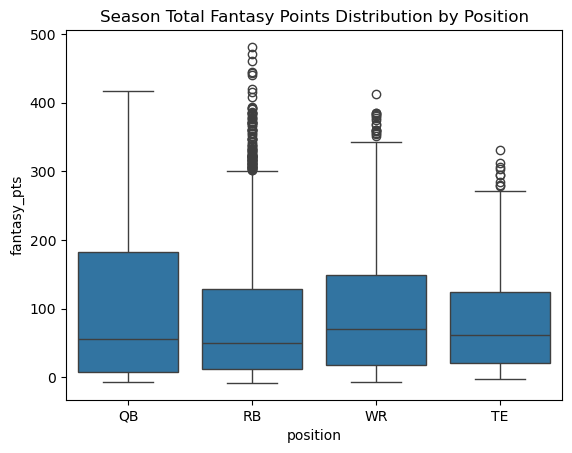

In [9]:
sns.boxplot(data=all_players, x='position', y='fantasy_pts')
plt.title('Season Total Fantasy Points Distribution by Position')
plt.show()

Which positions have the most year-to-year consistency in performance?

In [10]:
all_players['ff_pts_prev_year'] = all_players.groupby('id')['fantasy_pts'].shift(1)
all_players['ff_pts_diff'] = all_players['fantasy_pts'] - all_players['ff_pts_prev_year']
all_players.head()

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,birth_date,height,weight,college,gsis_id,years_exp,headshot_url,rookie_year,ff_pts_prev_year,ff_pts_diff
0,1999,0,1276.0,7.0,0.0,9.0,6.0,33.0,0.0,0.0,...,1968-01-31,75.0,216.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN,NaN,NaN
1,2000,0,1047.0,2.0,0.0,8.0,0.0,68.0,0.0,0.0,...,1968-01-31,75.0,216.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN,52.34,-11.66
2,2001,0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,1968-01-31,75.0,220.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN,40.68,-40.78
3,2002,0,134.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,1968-01-31,75.0,220.0,NaN,00-0012726,11.0,https://static.www.nfl.com/image/private/f_aut...,1991.0,-0.10,9.36
4,2003,0,16.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0,...,1968-01-31,75.0,220.0,NaN,00-0012726,12.0,https://static.www.nfl.com/image/private/f_aut...,1991.0,9.26,-9.32


In [11]:
all_players.groupby('position')['ff_pts_diff'].describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
QB,1612.0,-4.286179,82.299962,-387.0,-46.925,-2.07,32.735,406.72
RB,2725.0,-7.045930,73.558615,-394.8,-45.100,-2.10,24.200,332.80
TE,781.0,-0.681485,53.301115,-182.0,-29.900,0.00,26.200,205.40
WR,3433.0,-5.446391,67.852323,-307.6,-44.900,-3.00,31.900,325.80


Seems that Tight Ends have the greatest mean in ff pts difference year to year. Tight Ends also have the lowest standard deviation in points year to year.

What is the correlation between a player’s fantasy finish and:
ADP?
Team offensive stats?
Number of games played?

In [110]:
def parse_player_info(info):
    if not isinstance(info, str) or not info.strip():
        return [None, None, None]
    bye_match = re.search(r'\((\d+)\)', info)
    bye = bye_match.group(1) if bye_match else None

    name_team_str = re.split(r'\s*\(\d+\)', info)[0].strip()

    parts = name_team_str.split()

    suffixes = {'Jr.', 'Sr.', 'Jr', 'Sr', 'II', 'III', 'IV', 'V', 'VI', 'VII'}
    if parts and re.fullmatch(r'[A-Z]{2,3}', parts[-1]) and parts[-1] not in suffixes:
        team = parts[-1]
        name_parts = parts[:-1]
    else:
        team = None
        name_parts = parts

    name = ' '.join(name_parts)

    return [name or None, team, bye]


def split_adp_data(adp_df):
    # Splits POS column into position and position length, also splits Player Team (Bye) into full_name, team, and bye_week.
    adp_df = adp_df[~adp_df['POS'].str.startswith('DST')] # Removes defenses from df
    adp_df[['position', 'position_rank']] = adp_df['POS'].str.extract(r'([A-Za-z]+)(\d+)')
    adp_df[['full_name', 'team', 'bye_week']] = adp_df['Player Team (Bye)'].apply(parse_player_info).apply(pd.Series)
    return adp_df

def adp_data_all_years(most_recent_year, split=False, save_to_csv=False, csv_filepath=None):
    adp_dfs = []
    for year in range(2015, most_recent_year+1):
        print(f'Retreiving ADP data from {year}...')
        df = retreive_adp_data(year)
        df['year'] = year
        adp_dfs.append(df)
    df = pd.concat(adp_dfs)
    if split:
        df = split_adp_data(df)
    if save_to_csv:
        df.to_csv(csv_filepath, index=False)
        print(f'Saved data to {csv_filepath}')
    return df

In [111]:
adp_data = adp_data_all_years(2024, split=True, save_to_csv=True, csv_filepath='../data/raw/adp_data.csv')
#adp_data = pd.read_csv('../data/raw/adp_data.csv')
adp_data.head()

Retreiving ADP data from 2015...
Retreiving ADP data from 2016...
Retreiving ADP data from 2017...
Retreiving ADP data from 2018...
Retreiving ADP data from 2019...
Retreiving ADP data from 2020...
Retreiving ADP data from 2021...
Retreiving ADP data from 2022...
Retreiving ADP data from 2023...
Retreiving ADP data from 2024...


C:\Users\irela\AppData\Local\Temp\ipykernel_13676\2160031688.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adp_df[['position', 'position_rank']] = adp_df['POS'].str.extract(r'([A-Za-z]+)(\d+)')
C:\Users\irela\AppData\Local\Temp\ipykernel_13676\2160031688.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adp_df[['position', 'position_rank']] = adp_df['POS'].str.extract(r'([A-Za-z]+)(\d+)')


Saved data to ../data/raw/adp_data.csv


C:\Users\irela\AppData\Local\Temp\ipykernel_13676\2160031688.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adp_df[['full_name', 'team', 'bye_week']] = adp_df['Player Team (Bye)'].apply(parse_player_info).apply(pd.Series)
C:\Users\irela\AppData\Local\Temp\ipykernel_13676\2160031688.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adp_df[['full_name', 'team', 'bye_week']] = adp_df['Player Team (Bye)'].apply(parse_player_info).apply(pd.Series)
C:\Users\irela\AppData\Local\Temp\ipykernel_13676\216003

,Rank,Player Team (Bye),POS,ESPN,Sleeper,NFL,RTSports,FFC,AVG,year,position,position_rank,full_name,team,bye_week
0,1,Le'Veon Bell,RB1,NaN,NaN,NaN,1.0,NaN,1.5,2015,RB,1,Le'Veon Bell,None,None
1,2,Adrian Peterson,RB2,NaN,NaN,NaN,2.0,NaN,1.8,2015,RB,2,Adrian Peterson,None,None
2,3,Antonio Brown,WR1,NaN,NaN,NaN,4.0,NaN,3.8,2015,WR,1,Antonio Brown,None,None
3,4,Jamaal Charles,RB3,NaN,NaN,NaN,5.0,NaN,4.0,2015,RB,3,Jamaal Charles,None,None
4,5,Eddie Lacy,RB4,NaN,NaN,NaN,3.0,NaN,4.0,2015,RB,4,Eddie Lacy,None,None


In [112]:
adp_data['full_name'].nunique()

2100

In [ ]:
# Now to figure out how to merge on names...

# Would like a function that takes all_players full_name and matches with adp_data full_name. 
# To do this, I think I will use fuzzy word matching, along with team and season data to find closest matches.
# Then, return a df containing the season, team, and name from each dataframe that were 'matched' to check.
# Finally, provide all names that had no matches.

from rapidfuzz import fuzz

name1 = "Le'Veon Bell"
name2 = 'Leveon Bell II'
name3 = 'Pat Mahomes II'

print(f"Similarity between '{name1}' and '{name2}': {fuzz.ratio(name1, name2)}")
print(f"Similarity between '{name1}' and '{name3}': {fuzz.ratio(name1, name3)}")
print(f"Similarity between '{name2}' and '{name3}': {fuzz.ratio(name2, name3)}")


Similarity between 'Le'Veon Bell' and 'Leveon Bell II': 76.92307692307692
Similarity between 'Le'Veon Bell' and 'Pat Mahomes II': 15.384615384615385
Similarity between 'Leveon Bell II' and 'Pat Mahomes II': 35.71428571428571


In [ ]:
from rapidfuzz import fuzz, process

def fuzzy_match_names(df1, df2, name_col_df1='full_name', name_col_df2='full_name', threshold=85):
    matches = []
    for name in df1[name_col_df1]:
        match, score, idx = process.extractOne(
            name,
            df2[name_col_df2],
            scorer=fuzz.token_sort_ratio
        )
        if score >= threshold:
            matches.append({'Original': name, 'Matched': match, 'Score': score})
        else:
            matches.append({'Original': name, 'Matched': None, 'Score': score})

    return pd.DataFrame(matches)

In [22]:
matched_df = fuzzy_match_names(all_players, adp_data)
matched_df.head()

,Original,Matched,Score
0,Doug Pederson,None,76.923077
1,Doug Pederson,None,76.923077
2,Doug Pederson,None,76.923077
3,Doug Pederson,None,76.923077
4,Doug Pederson,None,76.923077


In [ ]:
import pandas as pd
from rapidfuzz import fuzz, process

def fuzzy_match_names_by_group(df1, df2, 
                                forbidden_pairs,
                                name_col_df1='full_name', 
                                name_col_df2='full_name',
                                team_col='team', 
                                season_col='season',
                                position_col='position',
                                threshold=80):
    matches = []
    grouped_df1 = df1.groupby([season_col, team_col])

    for (season, team), group1 in grouped_df1:
        for _, row in group1.iterrows():
            name = row[name_col_df1]
            position = row[position_col]

            group2 = df2[(df2[season_col] == season)]

            if position_col in df2.columns and position:
                group2 = group2[group2[position_col] == position]

            candidates = group2[name_col_df2].dropna().tolist()
            
            if not candidates:
                matches.append({
                    'team': team,
                    'position': position,
                    'season':season,
                    'original': name,
                    'matched': None,
                    'score': 0
                })
                continue

            results = process.extract(name, candidates, scorer=fuzz.token_sort_ratio, limit=3)

            match_found = False
            for match, score, _ in results:
                name_lower = name.lower()
                match_lower = match.lower()

                if frozenset([name_lower, match_lower]) in forbidden_pairs:
                    continue

                if score >= threshold:
                    matches.append({
                        'team': team,
                        'position': position,
                        'season':season,
                        'original': name,
                        'matched': match,
                        'score': score
                    })
                    match_found = True
                    """
                    if score < 100:
                        print(f'season: {season}')
                        print(f'position: {position}')
                        print(f'name: {name}, result: {results}')
                        print(f'match: {match}')
                    """
                    break

            if not match_found:
                matches.append({
                    'team': team,
                    'position': position,
                    'season':season,
                    'original': name,
                    'matched': None,
                    'score': 0
                })

    return pd.DataFrame(matches)


In [185]:
lfad = adp_data[adp_data['full_name']=='Larry Fitzgerald']
lfad

,Rank,Player Team (Bye),POS,ESPN,Sleeper,NFL,RTSports,FFC,AVG,season,position,position_rank,full_name,team,bye_week,merge_key
85,86,Larry Fitzgerald,WR33,NaN,NaN,NaN,84.0,NaN,91.0,2015,WR,33,Larry Fitzgerald,None,None,larry fitzgerald
54,55,Larry Fitzgerald,WR27,NaN,NaN,NaN,NaN,NaN,57.5,2016,WR,27,Larry Fitzgerald,None,None,larry fitzgerald
46,47,Larry Fitzgerald,WR22,44.0,NaN,NaN,NaN,NaN,47.8,2017,WR,22,Larry Fitzgerald,None,None,larry fitzgerald
31,32,Larry Fitzgerald,WR14,30.0,NaN,NaN,37.0,NaN,33.6,2018,WR,14,Larry Fitzgerald,None,None,larry fitzgerald
96,97,Larry Fitzgerald,WR41,102.0,NaN,121.0,101.0,NaN,100.2,2019,WR,41,Larry Fitzgerald,None,None,larry fitzgerald
176,177,Larry Fitzgerald,WR64,161.0,NaN,NaN,211.0,NaN,182.8,2020,WR,64,Larry Fitzgerald,None,None,larry fitzgerald
332,333,Larry Fitzgerald,WR101,NaN,NaN,268.0,NaN,NaN,268.0,2021,WR,101,Larry Fitzgerald,None,None,larry fitzgerald


In [186]:
lfap = all_players[all_players['full_name']=='Larry Fitzgerald']
lfap

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,height,weight,college,gsis_id,years_exp,headshot_url,rookie_year,ff_pts_prev_year,ff_pts_diff,merge_key
3838,2004,58,0.0,0.0,0.0,0.0,0.0,14.0,0.0,780.0,...,75.0,223.0,Pittsburgh,00-0022921,0.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,NaN,NaN,larry fitzgerald
3839,2005,103,0.0,0.0,0.0,0.0,0.0,41.0,0.0,1409.0,...,75.0,221.0,Pittsburgh,00-0022921,1.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,185.40,122.60,larry fitzgerald
3840,2006,68,0.0,0.0,0.0,0.0,0.0,5.0,0.0,941.0,...,75.0,226.0,Pittsburgh,00-0022921,2.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,308.00,-109.40,larry fitzgerald
3841,2007,101,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1412.0,...,75.0,226.0,Pittsburgh,00-0022921,3.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,198.60,97.60,larry fitzgerald
3842,2008,96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1434.0,...,75.0,220.0,Pittsburgh,00-0022921,4.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,296.20,15.20,larry fitzgerald
3843,2009,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1092.0,...,75.0,217.0,Pittsburgh,00-0022921,5.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,311.40,-27.20,larry fitzgerald
3844,2010,90,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1137.0,...,75.0,218.0,Pittsburgh,00-0022921,6.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,284.20,-42.50,larry fitzgerald
3845,2011,80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1411.0,...,75.0,218.0,Pittsburgh,00-0022921,7.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,241.70,27.40,larry fitzgerald
3846,2012,71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,798.0,...,75.0,218.0,Pittsburgh,00-0022921,8.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,269.10,-94.30,larry fitzgerald
3847,2013,82,0.0,0.0,0.0,0.0,1.0,8.0,0.0,954.0,...,75.0,218.0,Pittsburgh,00-0022921,9.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,174.80,61.40,larry fitzgerald


In [250]:
def get_default_forbidden_pairs():
    return {
        frozenset(['derek carrier', 'derek carr']),
        frozenset(['byron marshall', 'brandon marshall']),
        frozenset(['nick williams', 'mike williams']),
        frozenset(['kasen williams', 'karlos williams']),
        frozenset(['trey williams', 'andre williams']),
        frozenset(['ryan mallett', 'matt ryan']),
        frozenset(['nick foles', 'nick folk']),
        frozenset(['jake plummer', 'jack plummer']),
        frozenset(['bijan robinson', 'brian robinson']),
        frozenset(['jalen coker', 'jalen cropper']),
        frozenset(['deonte harris', 'deonte harty']),
        frozenset(['noah brown', 'john brown']),
        frozenset(['marquise goodwin', 'marquise brown']),
        frozenset(['dwayne washington', 'deandre washington']),
        frozenset(['trayveon williams', "ty'son williams"]),
        frozenset(['malik davis', 'mike davis']),
        frozenset(['james wright', 'jarius wright']),
    }

def get_candidates(df2, season, position, name_col, season_col, position_col):
    group = df2[df2[season_col] == season]
    if position_col in df2.columns and position:
        group = group[group[position_col] == position]
    return group[name_col].dropna().tolist()

def find_best_match(name, candidates, forbidden_pairs, threshold):
    results = process.extract(name, candidates, scorer=fuzz.token_sort_ratio, limit=3)
    name_lower = name.lower()

    for match, score, _ in results:
        match_lower = match.lower()
        if frozenset([name_lower, match_lower]) in forbidden_pairs:
            continue
        if score >= threshold:
            return match, score
    return None, 0

def fuzzy_match_names_by_group(df1, df2,
                                forbidden_pairs=None,
                                name_col_df1='full_name', 
                                name_col_df2='full_name',
                                team_col='team', 
                                season_col='season',
                                position_col='position',
                                threshold=80):

    if forbidden_pairs is None:
        forbidden_pairs = get_default_forbidden_pairs()

    matches = []
    grouped_df1 = df1.groupby([season_col, team_col])

    for (season, team), group1 in grouped_df1:
        for _, row in group1.iterrows():
            name = row[name_col_df1]
            position = row.get(position_col, None)

            candidates = get_candidates(df2, season, position, name_col_df2, season_col, position_col)
            match, score = find_best_match(name, candidates, forbidden_pairs, threshold)

            matches.append({
                'team': team,
                'position': position,
                'season': season,
                'original': name,
                'matched': match,
                'score': score
            })

    return pd.DataFrame(matches)

In [251]:
df = fuzzy_match_names_by_group(all_players, adp_data)
df.head()

,team,position,season,original,matched,score
0,ARI,RB,1999,Adrian Murrell,None,0.0
1,ARI,QB,1999,Jake Plummer,None,0.0
2,ARI,RB,1999,Joel Makovicka,None,0.0
3,ARI,RB,1999,Mario Bates,None,0.0
4,ARI,WR,1999,David Boston,None,0.0


In [252]:
def fuzzy_match_names_by_group(df1, df2, 
                                forbidden_pairs=None,
                                name_col_df1='full_name', 
                                name_col_df2='full_name',
                                team_col='team', 
                                season_col='season',
                                position_col='position',
                                threshold=80):
    matches = []
    grouped_df1 = df1.groupby([season_col, team_col])

    if not forbidden_pairs:
        forbidden_pairs = {
            frozenset(['derek carrier', 'derek carr']),
            frozenset(['byron marshall', 'brandon marshall']),
            frozenset(['nick williams', 'mike williams']),
            frozenset(['kasen williams', 'karlos williams']),
            frozenset(['trey williams', 'andre williams']),
            frozenset(['ryan mallett', 'matt ryan']),
            frozenset(['nick foles', 'nick folk']),
            frozenset(['jake plummer', 'jack plummer']),
            frozenset(['bijan robinson', 'brian robinson']),
            frozenset(['jalen coker', 'jalen cropper']),
            frozenset(['deonte harris', 'deonte harty']),
            frozenset(['noah brown', 'john brown']),
            frozenset(['marquise goodwin', 'marquise brown']),
            frozenset(['dwayne washington', 'deandre washington']),
            frozenset(['trayveon williams', "ty'son williams"]),
            frozenset(['malik davis', 'mike davis']),
            frozenset(['james wright', 'jarius wright'])
        }

    for (season, team), group1 in grouped_df1:
        for _, row in group1.iterrows():
            name = row[name_col_df1]
            position = row[position_col]

            group2 = df2[(df2[season_col] == season)]

            if position_col in df2.columns and position:
                group2 = group2[group2[position_col] == position]

            candidates = group2[name_col_df2].dropna().tolist()
            
            if not candidates:
                matches.append({
                    'team': team,
                    'position': position,
                    'season':season,
                    'original': name,
                    'matched': None,
                    'score': 0
                })
                continue

            results = process.extract(name, candidates, scorer=fuzz.token_sort_ratio, limit=3)

            match_found = False
            for match, score, _ in results:
                name_lower = name.lower()
                match_lower = match.lower()

                if frozenset([name_lower, match_lower]) in forbidden_pairs:
                    continue

                if score >= threshold:
                    matches.append({
                        'team': team,
                        'position': position,
                        'season':season,
                        'original': name,
                        'matched': match,
                        'score': score
                    })
                    match_found = True
                    """
                    if score < 100:
                        print(f'season: {season}')
                        print(f'position: {position}')
                        print(f'name: {name}, result: {results}')
                        print(f'match: {match}')
                    """
                    break

            if not match_found:
                matches.append({
                    'team': team,
                    'position': position,
                    'season':season,
                    'original': name,
                    'matched': None,
                    'score': 0
                })

    return pd.DataFrame(matches)

In [253]:
adp_data = adp_data.rename(columns={'year':'season'})
forbidden_pairs = {
    frozenset(['derek carrier', 'derek carr']),
    frozenset(['byron marshall', 'brandon marshall']),
    frozenset(['nick williams', 'mike williams']),
    frozenset(['kasen williams', 'karlos williams']),
    frozenset(['trey williams', 'andre williams']),
    frozenset(['ryan mallett', 'matt ryan']),
    frozenset(['nick foles', 'nick folk']),
    frozenset(['jake plummer', 'jack plummer']),
    frozenset(['bijan robinson', 'brian robinson']),
    frozenset(['jalen coker', 'jalen cropper']),
    frozenset(['deonte harris', 'deonte harty']),
    frozenset(['noah brown', 'john brown']),
    frozenset(['marquise goodwin', 'marquise brown']),
    frozenset(['dwayne washington', 'deandre washington']),
    frozenset(['trayveon williams', "ty'son williams"]),
    frozenset(['malik davis', 'mike davis']),
    frozenset(['james wright', 'jarius wright'])
}
matched_grouped = fuzzy_match_names_by_group(all_players, adp_data, forbidden_pairs, threshold=80)

matched_grouped.head()


,team,position,season,original,matched,score
0,ARI,RB,1999,Adrian Murrell,None,0.0
1,ARI,QB,1999,Jake Plummer,None,0.0
2,ARI,RB,1999,Joel Makovicka,None,0.0
3,ARI,RB,1999,Mario Bates,None,0.0
4,ARI,WR,1999,David Boston,None,0.0


In [248]:
matched_grouped['matched'].nunique()

578

In [249]:
matched_grouped['original'].nunique()

2416

In [192]:
matched_df_clean = matched_grouped[matched_grouped['matched'].notna()]

In [193]:
all_players['merge_key'] = all_players['full_name'].str.lower()
adp_data['merge_key'] = adp_data['full_name'].str.lower()



In [ ]:
matched_df_clean['original_key'] = matched_df_clean['original'].str.lower()
matched_df_clean['matched_key'] = matched_df_clean['matched'].str.lower()

C:\Users\irela\AppData\Local\Temp\ipykernel_13676\1677267037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_df_clean['original_key'] = matched_df_clean['original'].str.lower()
C:\Users\irela\AppData\Local\Temp\ipykernel_13676\1677267037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_df_clean['matched_key'] = matched_df_clean['matched'].str.lower()


In [195]:
all_players.columns

Index(['season', 'reception', 'passing_yards', 'pass_touchdown',
       'rush_touchdown', 'interception', 'fumble_lost', 'rushing_yards',
       'two_pt', 'receiving_yards', 'receive_touchdown', 'id', 'fantasy_pts',
       'team', 'position', 'depth_chart_position', 'jersey_number', 'status',
       'full_name', 'first_name', 'last_name', 'birth_date', 'height',
       'weight', 'college', 'gsis_id', 'years_exp', 'headshot_url',
       'rookie_year', 'ff_pts_prev_year', 'ff_pts_diff', 'merge_key'],
      dtype='object')

In [196]:
matched_df_clean.columns

Index(['team', 'position', 'season', 'original', 'matched', 'score',
       'original_key', 'matched_key'],
      dtype='object')

In [199]:
all_players_merged = matched_df_clean.merge(all_players, left_on=['original_key', 'team', 'position', 'season'], right_on=['merge_key', 'team', 'position', 'season'], suffixes=('', '_all_players'), how='right')
all_players_merged.head()

,team,position,season,original,matched,score,original_key,matched_key,reception,passing_yards,...,height,weight,college,gsis_id,years_exp,headshot_url,rookie_year,ff_pts_prev_year,ff_pts_diff,merge_key
0,PHI,QB,1999,NaN,NaN,NaN,NaN,NaN,0,1276.0,...,75.0,216.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN,NaN,NaN,doug pederson
1,CLE,QB,2000,NaN,NaN,NaN,NaN,NaN,0,1047.0,...,75.0,216.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN,52.34,-11.66,doug pederson
2,GB,QB,2001,NaN,NaN,NaN,NaN,NaN,0,0.0,...,75.0,220.0,NaN,00-0012726,NaN,https://static.www.nfl.com/image/private/f_aut...,NaN,40.68,-40.78,doug pederson
3,GB,QB,2002,NaN,NaN,NaN,NaN,NaN,0,134.0,...,75.0,220.0,NaN,00-0012726,11.0,https://static.www.nfl.com/image/private/f_aut...,1991.0,-0.10,9.36,doug pederson
4,GB,QB,2003,NaN,NaN,NaN,NaN,NaN,0,16.0,...,75.0,220.0,NaN,00-0012726,12.0,https://static.www.nfl.com/image/private/f_aut...,1991.0,9.26,-9.32,doug pederson


In [200]:
lf = all_players_merged[all_players_merged['full_name']=='Larry Fitzgerald']
lf

,team,position,season,original,matched,score,original_key,matched_key,reception,passing_yards,...,height,weight,college,gsis_id,years_exp,headshot_url,rookie_year,ff_pts_prev_year,ff_pts_diff,merge_key
3209,ARZ,WR,2004,NaN,NaN,NaN,NaN,NaN,58,0.0,...,75.0,223.0,Pittsburgh,00-0022921,0.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,NaN,NaN,larry fitzgerald
3210,ARZ,WR,2005,NaN,NaN,NaN,NaN,NaN,103,0.0,...,75.0,221.0,Pittsburgh,00-0022921,1.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,185.40,122.60,larry fitzgerald
3211,ARZ,WR,2006,NaN,NaN,NaN,NaN,NaN,68,0.0,...,75.0,226.0,Pittsburgh,00-0022921,2.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,308.00,-109.40,larry fitzgerald
3212,ARZ,WR,2007,NaN,NaN,NaN,NaN,NaN,101,0.0,...,75.0,226.0,Pittsburgh,00-0022921,3.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,198.60,97.60,larry fitzgerald
3213,ARZ,WR,2008,NaN,NaN,NaN,NaN,NaN,96,0.0,...,75.0,220.0,Pittsburgh,00-0022921,4.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,296.20,15.20,larry fitzgerald
3214,ARZ,WR,2009,NaN,NaN,NaN,NaN,NaN,97,0.0,...,75.0,217.0,Pittsburgh,00-0022921,5.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,311.40,-27.20,larry fitzgerald
3215,ARZ,WR,2010,NaN,NaN,NaN,NaN,NaN,90,0.0,...,75.0,218.0,Pittsburgh,00-0022921,6.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,284.20,-42.50,larry fitzgerald
3216,ARZ,WR,2011,NaN,NaN,NaN,NaN,NaN,80,0.0,...,75.0,218.0,Pittsburgh,00-0022921,7.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,241.70,27.40,larry fitzgerald
3217,ARZ,WR,2012,NaN,NaN,NaN,NaN,NaN,71,0.0,...,75.0,218.0,Pittsburgh,00-0022921,8.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,269.10,-94.30,larry fitzgerald
3218,ARZ,WR,2013,NaN,NaN,NaN,NaN,NaN,82,0.0,...,75.0,218.0,Pittsburgh,00-0022921,9.0,https://static.www.nfl.com/image/private/f_aut...,2004.0,174.80,61.40,larry fitzgerald


In [207]:
all_players_merged.columns

Index(['team', 'position', 'season', 'original', 'matched', 'score',
       'original_key', 'matched_key', 'reception', 'passing_yards',
       'pass_touchdown', 'rush_touchdown', 'interception', 'fumble_lost',
       'rushing_yards', 'two_pt', 'receiving_yards', 'receive_touchdown', 'id',
       'fantasy_pts', 'depth_chart_position', 'jersey_number', 'status',
       'full_name', 'first_name', 'last_name', 'birth_date', 'height',
       'weight', 'college', 'gsis_id', 'years_exp', 'headshot_url',
       'rookie_year', 'ff_pts_prev_year', 'ff_pts_diff', 'merge_key'],
      dtype='object')

In [208]:
adp_data.columns

Index(['Rank', 'Player Team (Bye)', 'POS', 'ESPN', 'Sleeper', 'NFL',
       'RTSports', 'FFC', 'AVG', 'season', 'position', 'position_rank',
       'full_name', 'team', 'bye_week', 'merge_key'],
      dtype='object')

In [226]:
final_merged = all_players_merged.merge(adp_data, left_on=['position', 'matched_key', 'full_name', 'season'], right_on=['position', 'merge_key', 'full_name', 'season'], suffixes=('_all_players', '_adp_data'), how='left')
final_merged.head()

,team_all_players,position,season,original,matched,score,original_key,matched_key,reception,passing_yards,...,ESPN,Sleeper,NFL,RTSports,FFC,AVG,position_rank,team_adp_data,bye_week,merge_key_adp_data
0,PHI,QB,1999,NaN,NaN,NaN,NaN,NaN,0,1276.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CLE,QB,2000,NaN,NaN,NaN,NaN,NaN,0,1047.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GB,QB,2001,NaN,NaN,NaN,NaN,NaN,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GB,QB,2002,NaN,NaN,NaN,NaN,NaN,0,134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GB,QB,2003,NaN,NaN,NaN,NaN,NaN,0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_merged = final_merged.drop(columns=['team_adp_data', 'merge_key_adp_data', 'Sleeper', 'NFL', 'RTSports', 'FFC', 'original', 'matched', 'score', 'original_key', 'matched_key', 'merge_key_all_players', 'Player Team (Bye)', 'POS', 'depth_chart_position'])
final_merged = final_merged[['id']+[col for col in final_merged.columns if col != 'id']]

Index(['id', 'team_all_players', 'position', 'season', 'reception',
       'passing_yards', 'pass_touchdown', 'rush_touchdown', 'interception',
       'fumble_lost', 'rushing_yards', 'two_pt', 'receiving_yards',
       'receive_touchdown', 'fantasy_pts', 'jersey_number', 'status',
       'full_name', 'first_name', 'last_name', 'birth_date', 'height',
       'weight', 'college', 'gsis_id', 'years_exp', 'headshot_url',
       'rookie_year', 'ff_pts_prev_year', 'ff_pts_diff', 'Rank', 'ESPN', 'AVG',
       'position_rank', 'bye_week'],
      dtype='object')

In [244]:
final_merged['season_end_rank'] = final_merged.groupby(['position', 'season'])['fantasy_pts'].rank(method='dense', ascending=False).astype(int)
final_merged['season_end_rank_diff'] = final_merged['season_end_rank'] - final_merged['Rank']
final_merged['ESPN_season_end_rank_diff'] = final_merged['season_end_rank'] - final_merged['ESPN']

In [245]:
final_merged.head()

,id,team_all_players,position,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,...,ff_pts_prev_year,ff_pts_diff,Rank,ESPN,AVG,position_rank,bye_week,season_end_rank,ESPN_season_end_rank_diff,season_end_rank_diff
0,00-0012726,PHI,QB,1999,0,1276.0,7.0,0.0,9.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,NaN,NaN
1,00-0012726,CLE,QB,2000,0,1047.0,2.0,0.0,8.0,0.0,...,52.34,-11.66,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
2,00-0012726,GB,QB,2001,0,0.0,0.0,0.0,0.0,0.0,...,40.68,-40.78,NaN,NaN,NaN,NaN,NaN,70,NaN,NaN
3,00-0012726,GB,QB,2002,0,134.0,1.0,0.0,0.0,0.0,...,-0.10,9.36,NaN,NaN,NaN,NaN,NaN,54,NaN,NaN
4,00-0012726,GB,QB,2003,0,16.0,0.0,0.0,0.0,0.0,...,9.26,-9.32,NaN,NaN,NaN,NaN,NaN,75,NaN,NaN


In [215]:
lffm = final_merged[final_merged['full_name']=='Larry Fitzgerald']
lffm.head()

,team_all_players,position,season,original,matched,score,original_key,matched_key,reception,passing_yards,...,ESPN,Sleeper,NFL,RTSports,FFC,AVG,position_rank,team_adp_data,bye_week,merge_key_adp_data
3209,ARZ,WR,2004,NaN,NaN,NaN,NaN,NaN,58,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3210,ARZ,WR,2005,NaN,NaN,NaN,NaN,NaN,103,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3211,ARZ,WR,2006,NaN,NaN,NaN,NaN,NaN,68,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3212,ARZ,WR,2007,NaN,NaN,NaN,NaN,NaN,101,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3213,ARZ,WR,2008,NaN,NaN,NaN,NaN,NaN,96,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
tbad = adp_data[adp_data['full_name']=='Tom Brady']
tbad.head()

,Rank,Player Team (Bye),POS,ESPN,Sleeper,NFL,RTSports,FFC,AVG,season,position,position_rank,full_name,team,bye_week,merge_key
78,79,Tom Brady,QB8,NaN,NaN,NaN,83.0,NaN,80.5,2015,QB,8,Tom Brady,None,None,tom brady
72,73,Tom Brady,QB7,NaN,NaN,NaN,NaN,NaN,72.3,2016,QB,7,Tom Brady,None,None,tom brady
29,30,Tom Brady,QB2,22.0,NaN,NaN,NaN,NaN,30.8,2017,QB,2,Tom Brady,None,None,tom brady
46,47,Tom Brady,QB2,28.0,NaN,NaN,57.0,NaN,47.8,2018,QB,2,Tom Brady,None,None,tom brady
111,112,Tom Brady,QB13,93.0,NaN,97.0,136.0,NaN,116.3,2019,QB,13,Tom Brady,None,None,tom brady


In [217]:
tbfm = final_merged[final_merged['full_name']=='Tom Brady']
tbfm.head()

,team_all_players,position,season,original,matched,score,original_key,matched_key,reception,passing_yards,...,ESPN,Sleeper,NFL,RTSports,FFC,AVG,position_rank,team_adp_data,bye_week,merge_key_adp_data
1825,NE,QB,2000,NaN,NaN,NaN,NaN,NaN,0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1826,NE,QB,2001,NaN,NaN,NaN,NaN,NaN,1,2843.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1827,NE,QB,2002,NaN,NaN,NaN,NaN,NaN,0,3764.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1828,NE,QB,2003,NaN,NaN,NaN,NaN,NaN,0,3620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1829,NE,QB,2004,NaN,NaN,NaN,NaN,NaN,0,3690.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What’s the average point drop-off between draft rounds?

How volatile are fantasy scores week-to-week or year-to-year?

How close were preseason projections to actual outcomes?

Which positions/players are historically most over- or under-projected?

What level of variance exists in player outcomes vs. projections?

What % of drafted players miss significant time?

How much does injury risk affect fantasy point variability?

Are injury-prone players still top scorers when healthy?

How does team offensive rank affect player fantasy outcomes?

Do players perform better/worse when switching teams?

What impact does a new quarterback or head coach have?

How often do sleepers (late-round picks) end up as top-20 players?

Which draft positions yield the best total fantasy performance?

Are there trends or biases in who gets drafted too early or too late?

### Expanding Josh Allen's stats

In [28]:
ja = all_players[all_players['id']==josh_allen_id]
ja

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,receive_touchdown,id,fantasy_pts
10149,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,0.0,00-0034857,206.86
10150,2019,0,3089.0,20.0,9.0,9.0,4.0,510.0,3.0,0.0,0.0,00-0034857,288.56
10151,2020,1,4544.0,37.0,8.0,10.0,6.0,421.0,0.0,12.0,1.0,00-0034857,396.06
10152,2021,0,4168.0,34.0,6.0,15.0,3.0,700.0,3.0,0.0,0.0,00-0034857,378.72
10153,2022,0,4029.0,32.0,7.0,13.0,5.0,746.0,2.0,0.0,0.0,00-0034857,373.76
10154,2023,0,3947.0,27.0,15.0,16.0,3.0,457.0,3.0,0.0,0.0,00-0034857,369.58
10155,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,0.0,00-0034857,372.34


In [30]:
ja_df = pd.merge(ja, rosters, how='left', left_on=['id', 'season'], right_on=['gsis_id', 'season'])
ja_df

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,smart_id,entry_year,rookie_year,draft_club,ngs_position,week,game_type,status_description_abbr,football_name,draft_number
0,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,17.0,REG,A01,Josh,7.0
1,2019,0,3089.0,20.0,9.0,9.0,4.0,510.0,3.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,18.0,WC,A01,Josh,7.0
2,2020,1,4544.0,37.0,8.0,10.0,6.0,421.0,0.0,12.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,20.0,CON,A01,Josh,7.0
3,2021,0,4168.0,34.0,6.0,15.0,3.0,700.0,3.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,20.0,DIV,A01,Josh,7.0
4,2022,0,4029.0,32.0,7.0,13.0,5.0,746.0,2.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,20.0,DIV,A01,Josh,7.0
5,2023,0,3947.0,27.0,15.0,16.0,3.0,457.0,3.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,20.0,DIV,A01,Josh,7.0
6,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,3200414c-4c52-9264-bedc-c4ddaf201fe7,2018.0,2018.0,BUF,QB,21.0,CON,A01,Josh,7.0


In [32]:
next_gen_pass = pd.read_csv('../data/raw/next_gen_passing.csv', index_col=0).reset_index(drop=True)
next_gen_pass.head()

,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,...,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
0,2016,REG,0,Drew Brees,QB,NO,2.424238,6.195456,7.550997,-1.355541,...,69.985141,64.783965,5.201176,20.815996,59.033016,00-0020531,Drew,Brees,9,D.Brees
1,2016,REG,0,Joe Flacco,QB,BAL,2.566823,5.187294,7.720937,-2.533644,...,64.880952,64.367218,0.513734,20.995448,62.710625,00-0026158,Joe,Flacco,5,J.Flacco
2,2016,REG,0,Russell Wilson,QB,SEA,2.606104,7.167756,9.240646,-2.072890,...,64.652015,59.305514,5.346501,23.137055,61.277761,00-0029263,Russell,Wilson,3,R.Wilson
3,2016,REG,0,Josh McCown,QB,CLE,2.800770,7.360889,10.353818,-2.992929,...,54.545455,59.587162,-5.041707,23.423919,55.424624,00-0021206,Josh,McCown,13,NaN
4,2016,REG,0,Eli Manning,QB,NYG,2.527473,5.437374,8.191990,-2.754616,...,63.043478,63.397823,-0.354345,20.702627,57.601267,00-0022803,Eli,Manning,10,E.Manning


In [35]:
ja_ng = next_gen_pass[next_gen_pass['player_gsis_id']==josh_allen_id]
ja_ng.head()

,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,...,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
1173,2018,REG,0,Josh Allen,QB,BUF,3.217784,6.478698,11.029344,-4.550646,...,52.812500,60.919193,-8.106693,23.969448,67.257523,00-0034857,Joshua,Allen,17,J.Allen
1201,2018,REG,1,Josh Allen,QB,BUF,3.724800,11.066667,15.266667,-4.200000,...,40.000000,48.891475,-8.891475,27.437653,48.794920,00-0034857,Joshua,Allen,17,J.Allen
1241,2018,REG,2,Josh Allen,QB,BUF,3.504394,7.142222,10.744545,-3.602323,...,54.545455,63.544038,-8.998583,23.379660,63.935646,00-0034857,Joshua,Allen,17,J.Allen
1266,2018,REG,3,Josh Allen,QB,BUF,2.699636,3.708667,8.293182,-4.584515,...,68.181818,64.890220,3.291598,20.755469,52.429551,00-0034857,Joshua,Allen,17,J.Allen
1308,2018,REG,4,Josh Allen,QB,BUF,3.013848,4.710625,9.206061,-4.495436,...,48.484848,64.934962,-16.450113,24.352180,57.575886,00-0034857,Joshua,Allen,17,J.Allen


In [37]:
ja_ng_filtered = ja_ng[ja_ng['week']<18]
ja_ng_grouped = ja_ng_filtered.groupby('season').agg({'player_position':'first',
                                                      'team_abbr':'first',
                                                      'avg_time_to_throw':'mean',
                                                      'avg_completed_air_yards':'mean',
                                                      'avg_intended_air_yards':'mean',
                                                      'avg_air_yards_differential':'mean',
                                                      'aggressiveness':'mean',
                                                        # More to add...
                                                      })
ja_ng_grouped

,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,avg_air_yards_differential,aggressiveness
season,,,,,,,
2018,QB,BUF,3.217519,6.671415,11.151912,-4.480497,14.229480
2019,QB,BUF,2.851657,6.486776,9.481988,-2.995211,15.239672
2020,QB,BUF,3.045675,6.904674,8.833025,-1.928351,13.308553
2021,QB,BUF,2.919952,6.954294,8.837729,-1.883435,11.936116
2022,QB,BUF,2.856187,7.453386,9.359086,-1.905700,12.621350
2023,QB,BUF,2.890902,5.936266,8.551637,-2.615371,14.445016
2024,QB,BUF,2.892080,5.383275,8.326768,-2.943493,17.051663


In [34]:
ja_df = pd.merge(ja_df, next_gen_pass, how='left', left_on=['id', 'season'], right_on=['player_gsis_id', 'season'])
ja_df

,season,reception,passing_yards,pass_touchdown,rush_touchdown,interception,fumble_lost,rushing_yards,two_pt,receiving_yards,...,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
0,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,52.812500,60.919193,-8.106693,23.969448,67.257523,00-0034857,Joshua,Allen,17,J.Allen
1,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,40.000000,48.891475,-8.891475,27.437653,48.794920,00-0034857,Joshua,Allen,17,J.Allen
2,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,54.545455,63.544038,-8.998583,23.379660,63.935646,00-0034857,Joshua,Allen,17,J.Allen
3,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,68.181818,64.890220,3.291598,20.755469,52.429551,00-0034857,Joshua,Allen,17,J.Allen
4,2018,0,2044.0,10.0,8.0,12.0,2.0,631.0,1.0,0.0,...,48.484848,64.934962,-16.450113,24.352180,57.575886,00-0034857,Joshua,Allen,17,J.Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,55.172414,56.745687,-1.573274,24.757465,60.458993,00-0034857,Joshua,Allen,17,J.Allen
125,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,59.259259,57.271931,1.987328,20.651440,45.627335,00-0034857,Joshua,Allen,17,J.Allen
126,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,76.923077,64.237265,12.685812,21.267522,47.495419,00-0034857,Joshua,Allen,17,J.Allen
127,2024,0,3731.0,28.0,12.0,6.0,2.0,531.0,1.0,0.0,...,72.727273,74.503033,-1.775760,18.502121,39.714664,00-0034857,Joshua,Allen,17,J.Allen
